In [59]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Data preparation

In [60]:
data_covid=pd.read_csv("/content/sample_data/Covid Dataset.csv")
data_covid.head()

Breathing Problem Fever Dry Cough Sore throat Running Nose Asthma  \
0               Yes   Yes       Yes         Yes          Yes     No   
1               Yes   Yes       Yes         Yes           No    Yes   
2               Yes   Yes       Yes         Yes          Yes    Yes   
3               Yes   Yes       Yes          No           No    Yes   
4               Yes   Yes       Yes         Yes          Yes     No   

  Chronic Lung Disease Headache Heart Disease Diabetes  ... Fatigue   \
0                   No       No            No      Yes  ...      Yes   
1                  Yes      Yes            No       No  ...      Yes   
2                  Yes      Yes            No      Yes  ...      Yes   
3                   No       No           Yes      Yes  ...       No   
4                  Yes      Yes           Yes      Yes  ...       No   

  Gastrointestinal  Abroad travel Contact with COVID Patient  \
0               Yes            No                        Yes   
1                No            No                         No   
2               Yes           Yes                         No   
3                No           Yes                         No   
4               Yes            No                        Yes   

  Attended Large Gathering Visited Public Exposed Places  \
0                       No                           Yes   
1                      Yes                           Yes   
2                       No                            No   
3                      Yes                           Yes   
4                       No                           Yes   

  Family working in Public Exposed Places Wearing Masks  \
0                                     Yes            No   
1                                      No            No   
2                                      No            No   
3                                      No            No   
4                                      No            No   

  Sanitization from Market COVID-19  
0                       No      Yes  
1                       No      Yes  
2                       No      Yes  
3                       No      Yes  
4                       No      Yes  

[5 rows x 21 columns]

In [61]:
data_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [62]:
data_covid.dtypes

Breathing Problem                          object
Fever                                      object
Dry Cough                                  object
Sore throat                                object
Running Nose                               object
Asthma                                     object
Chronic Lung Disease                       object
Headache                                   object
Heart Disease                              object
Diabetes                                   object
Hyper Tension                              object
Fatigue                                    object
Gastrointestinal                           object
Abroad travel                              object
Contact with COVID Patient                 object
Attended Large Gathering                   object
Visited Public Exposed Places              object
Family working in Public Exposed Places    object
Wearing Masks                              object
Sanitization from Market                   object
COVID-19                                   object
dtype: object

In [63]:
unique_values = data_covid.apply(lambda col: col.unique())
print(unique_values)

Breathing Problem                          [Yes, No]
Fever                                      [Yes, No]
Dry Cough                                  [Yes, No]
Sore throat                                [Yes, No]
Running Nose                               [Yes, No]
Asthma                                     [No, Yes]
Chronic Lung Disease                       [No, Yes]
Headache                                   [No, Yes]
Heart Disease                              [No, Yes]
Diabetes                                   [Yes, No]
Hyper Tension                              [Yes, No]
Fatigue                                    [Yes, No]
Gastrointestinal                           [Yes, No]
Abroad travel                              [No, Yes]
Contact with COVID Patient                 [Yes, No]
Attended Large Gathering                   [No, Yes]
Visited Public Exposed Places              [Yes, No]
Family working in Public Exposed Places    [Yes, No]
Wearing Masks                                 

Because columns **Wearing Masks** and **Sanitization from Market** only have one value, the two columns will be dropped.

In [64]:
new_df = data_covid.drop(['Wearing Masks','Sanitization from Market'], axis = 1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

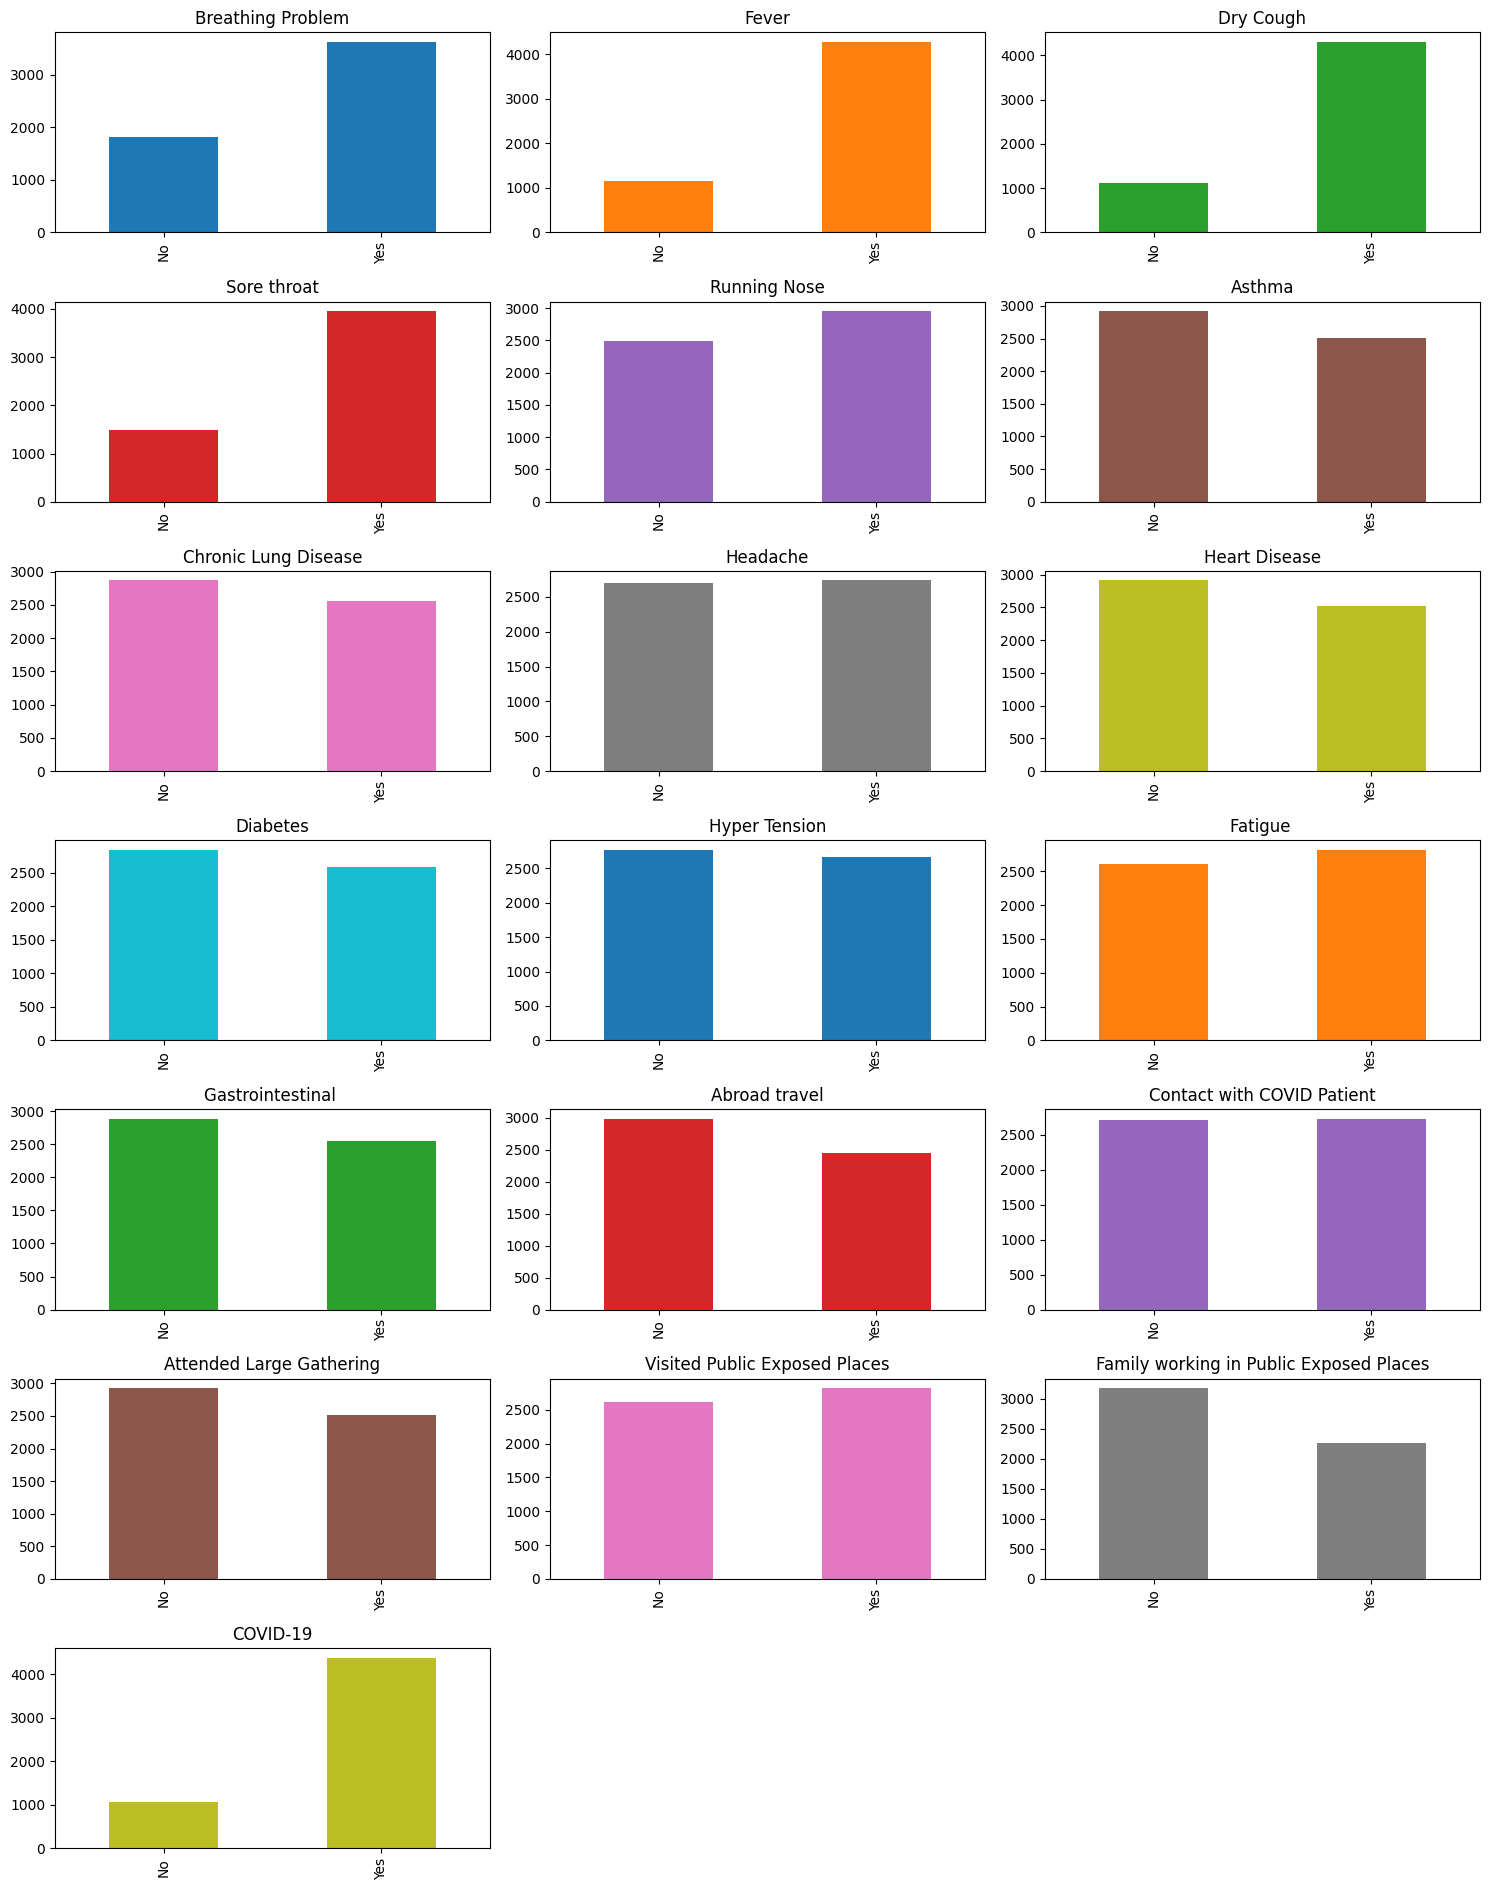

In [65]:
import matplotlib.pyplot as plt
new_df.apply(pd.Series.value_counts).plot(kind='bar', subplots=True, layout=(7, 3), figsize=(15, 19), legend=False, sharex=False, sharey=False)

plt.tight_layout()  #for the layout doesn't overlap
plt.show()

In [66]:
variables = new_df.columns[new_df.columns != 'COVID-19']
variables

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places'],
      dtype='object')

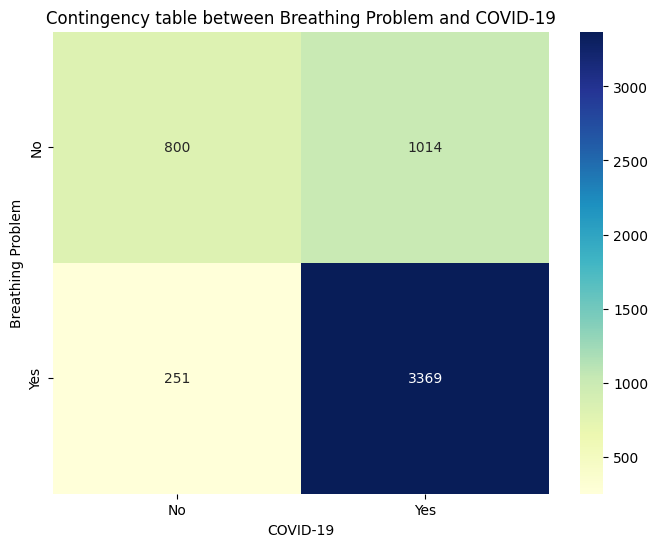

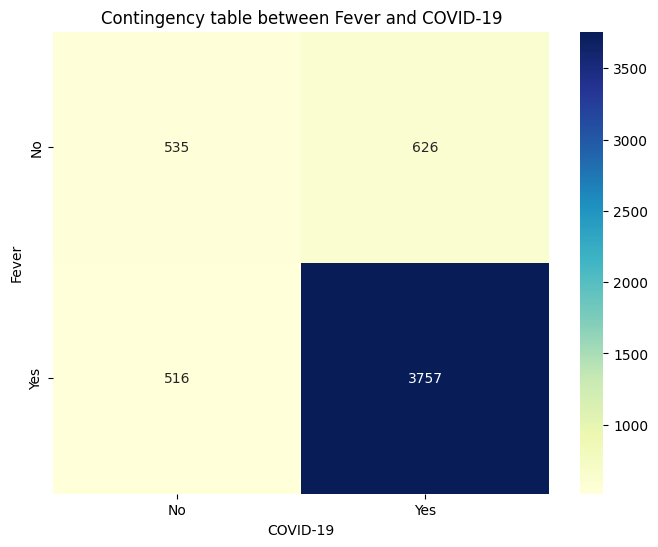

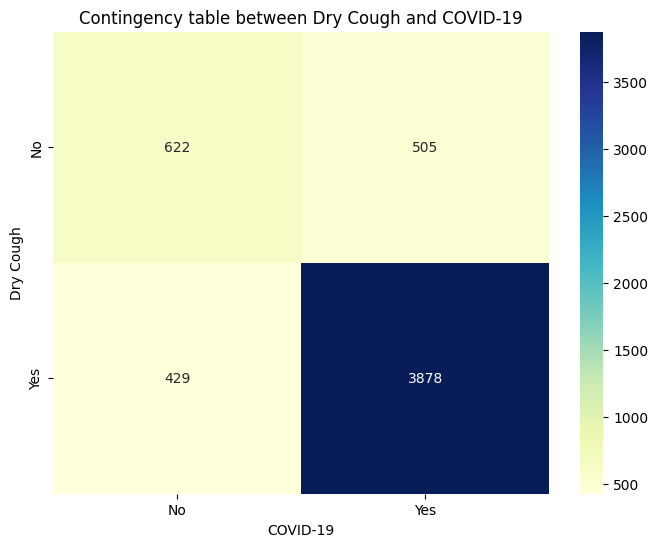

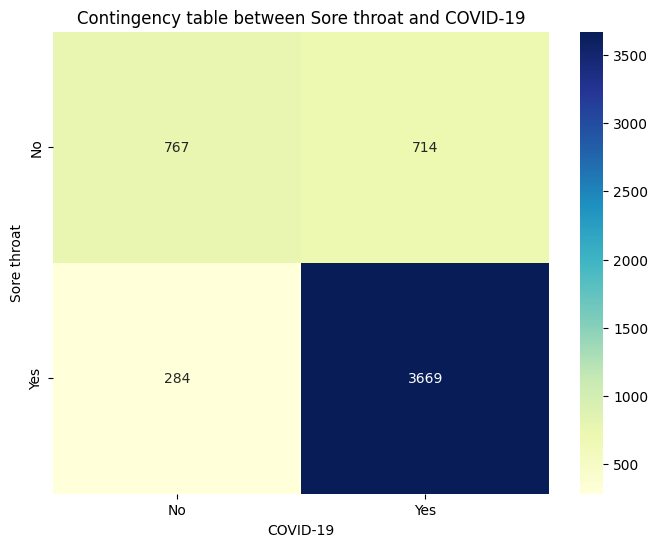

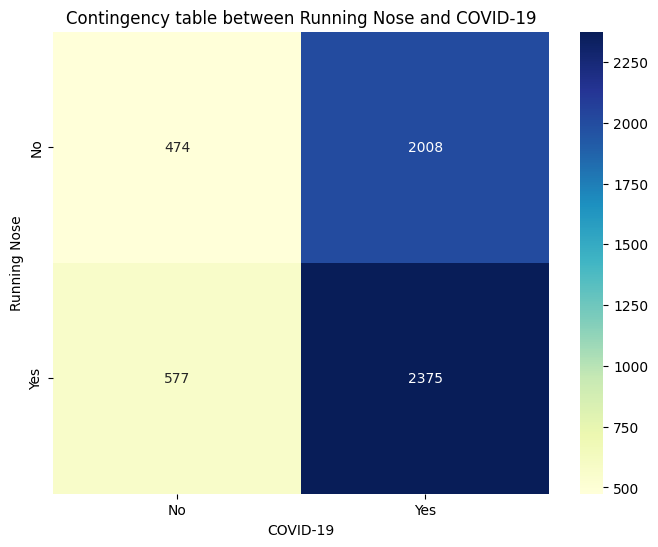

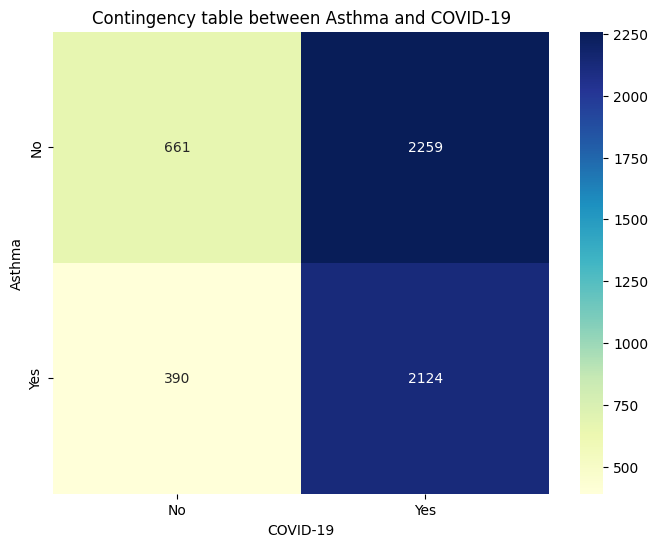

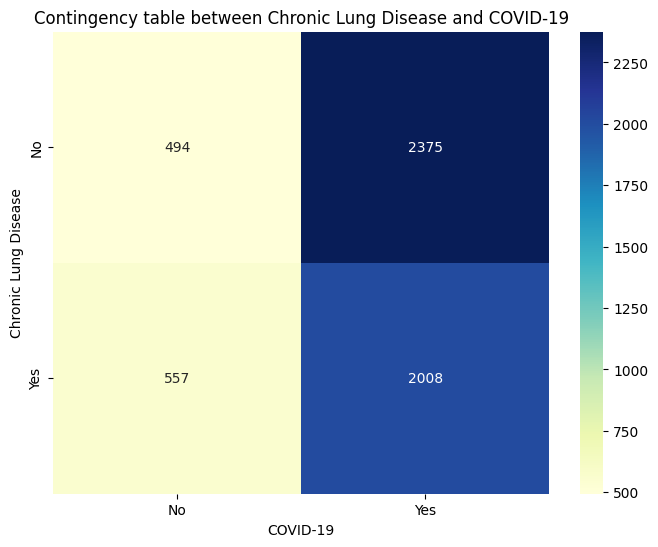

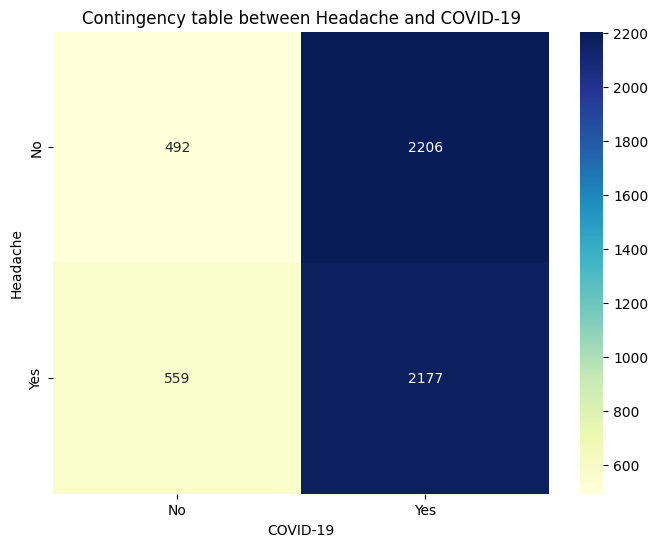

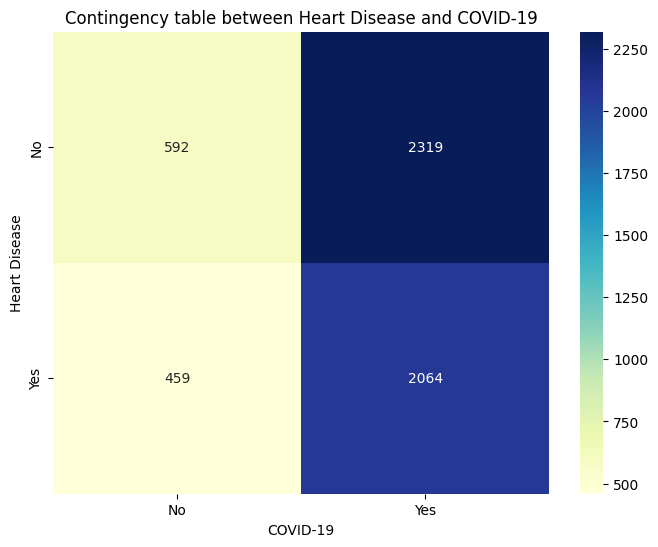

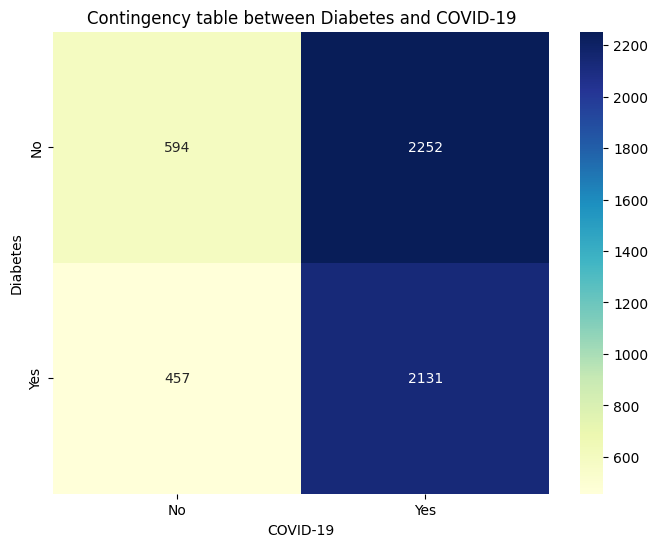

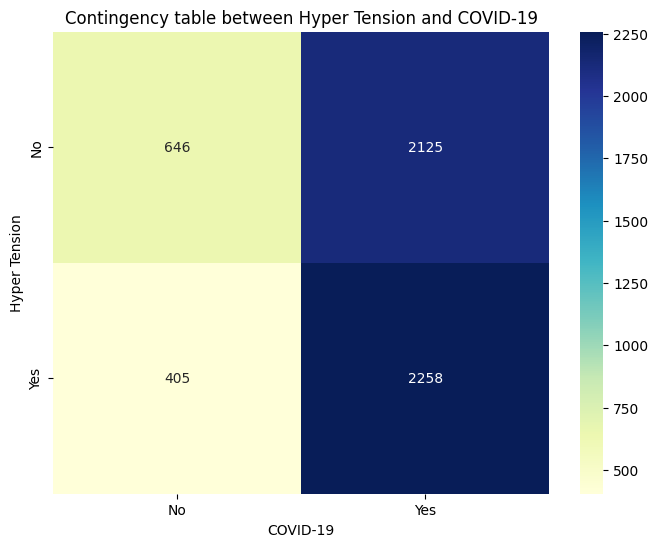

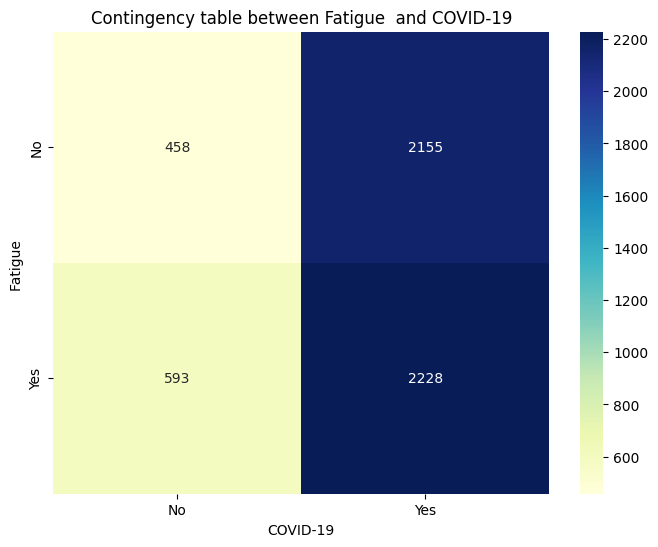

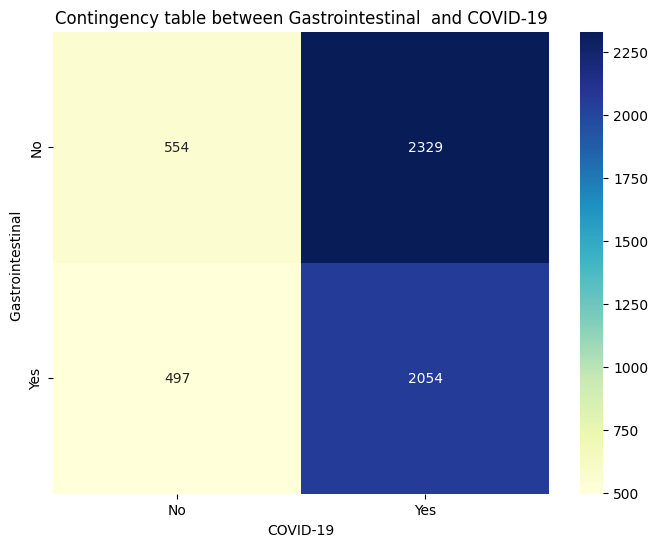

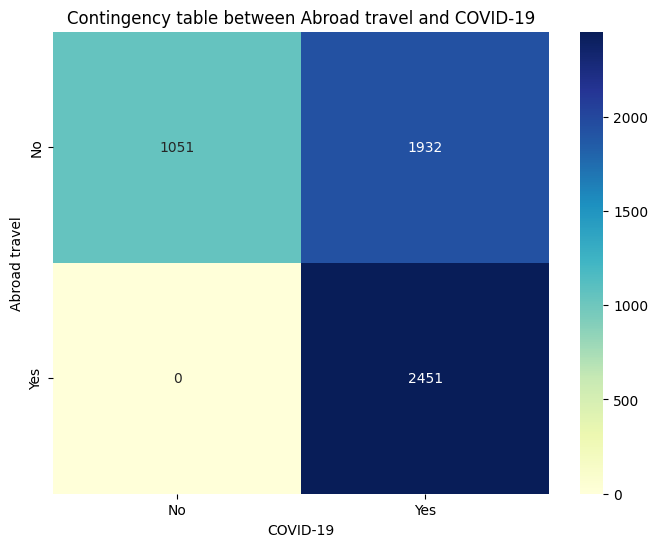

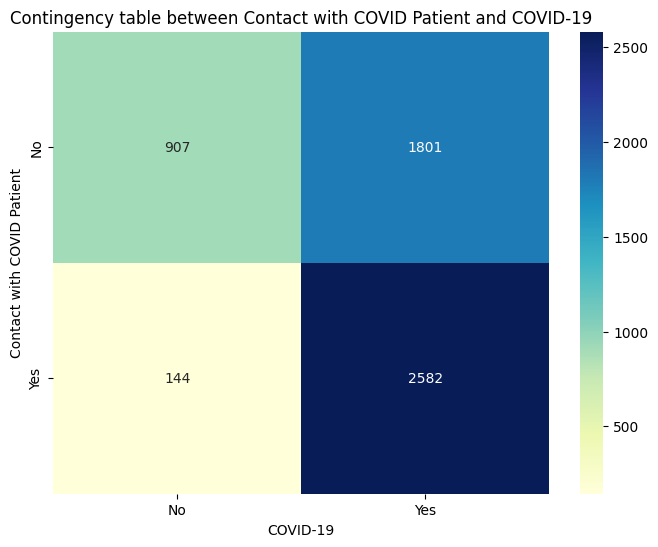

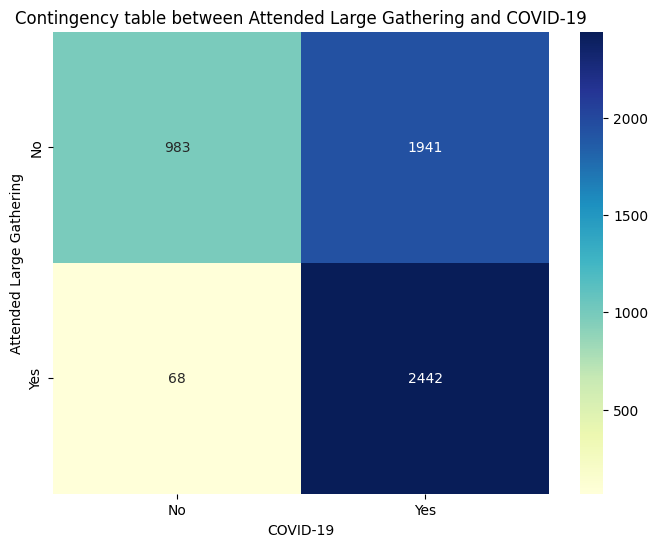

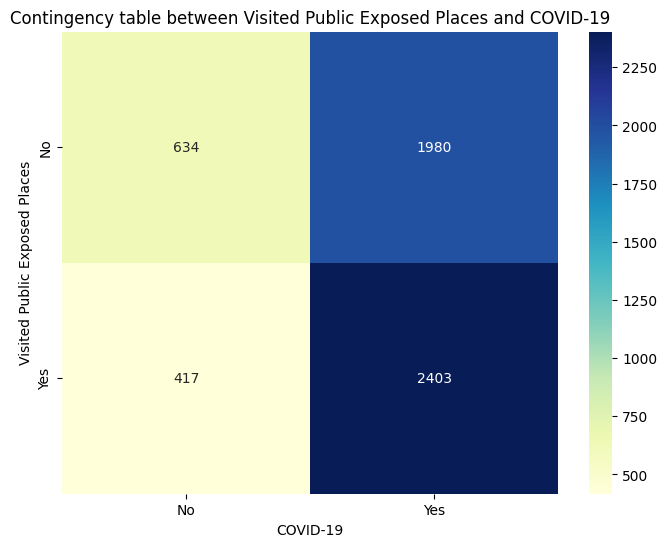

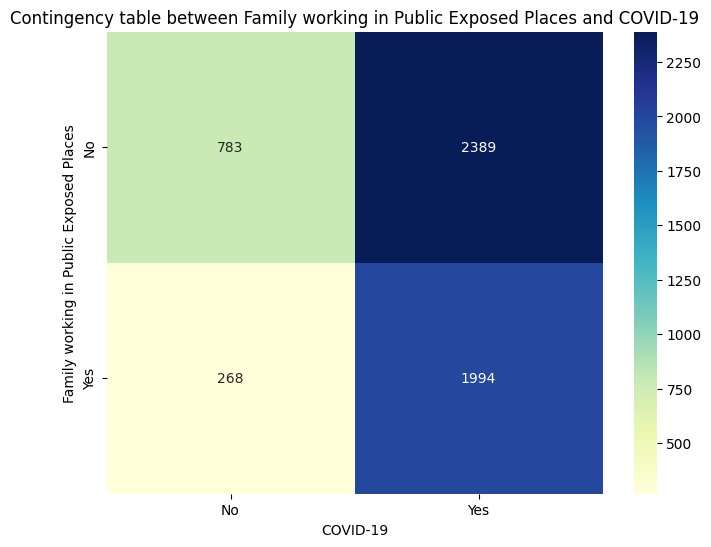

In [68]:

for var in variables:
    table = pd.crosstab(new_df[var], new_df['COVID-19'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(table, annot=True, cmap='YlGnBu', fmt='d')
    plt.title(f'Contingency table between {var} and COVID-19')
    plt.show()

In [69]:
mapping = {'Yes': 1, 'No': 0}
df_numeric = new_df.replace(mapping)
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Breathing Problem                        5434 non-null   int64
 1   Fever                                    5434 non-null   int64
 2   Dry Cough                                5434 non-null   int64
 3   Sore throat                              5434 non-null   int64
 4   Running Nose                             5434 non-null   int64
 5   Asthma                                   5434 non-null   int64
 6   Chronic Lung Disease                     5434 non-null   int64
 7   Headache                                 5434 non-null   int64
 8   Heart Disease                            5434 non-null   int64
 9   Diabetes                                 5434 non-null   int64
 10  Hyper Tension                            5434 non-null   int64
 11  Fati

<ipython-input-69-a0ea0d5bb23e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_numeric = new_df.replace(mapping)


In [70]:
df_numeric.head()

Breathing Problem  Fever  Dry Cough  Sore throat  Running Nose  Asthma  \
0                  1      1          1            1             1       0   
1                  1      1          1            1             0       1   
2                  1      1          1            1             1       1   
3                  1      1          1            0             0       1   
4                  1      1          1            1             1       0   

   Chronic Lung Disease  Headache  Heart Disease  Diabetes  Hyper Tension  \
0                     0         0              0         1              1   
1                     1         1              0         0              0   
2                     1         1              0         1              0   
3                     0         0              1         1              0   
4                     1         1              1         1              1   

   Fatigue   Gastrointestinal   Abroad travel  Contact with COVID Patient  \
0         1                  1              0                           1   
1         1                  0              0                           0   
2         1                  1              1                           0   
3         0                  0              1                           0   
4         0                  1              0                           1   

   Attended Large Gathering  Visited Public Exposed Places  \
0                         0                              1   
1                         1                              1   
2                         0                              0   
3                         1                              1   
4                         0                              1   

   Family working in Public Exposed Places  COVID-19  
0                                        1         1  
1                                        0         1  
2                                        0         1  
3                                        0         1  
4                                        0         1

In [71]:
Y = df_numeric['COVID-19']
X = df_numeric.drop(['COVID-19'], axis = 1)

In [72]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [73]:
X_train.shape[0]

4075

In [74]:
X_test.shape[0]

1359

In [75]:
Y_train.shape[0]

4075

In [76]:
Y_test.shape[0]

1359

In [77]:
y_train_counts = pd.Series(Y_train).value_counts()
y_train_counts

COVID-19
1    3299
0     776
Name: count, dtype: int64

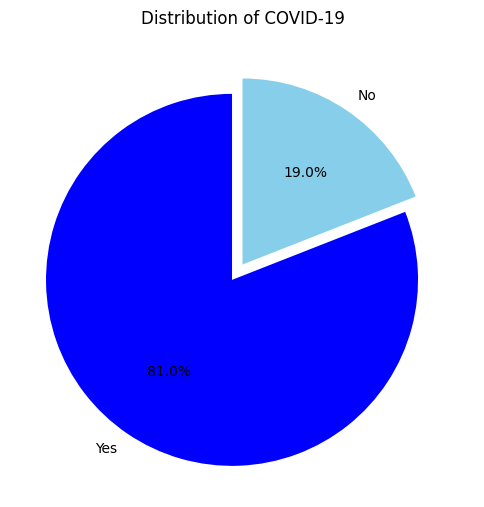

In [78]:
value_counts = Y_train.value_counts()

labels = {1: 'Yes', 0: 'No'}
labels_to_use = [labels[value] for value in value_counts.index]

plt.figure(figsize=(6,8))
plt.pie(value_counts,
        labels=labels_to_use,
        explode=(.1, 0),
        colors=['blue', 'skyblue'],
        autopct="%1.1f%%",
        startangle=90)
plt.title('Distribution of COVID-19')
plt.show()

The pie chart shows that the data train is imbalanced. To handle this, we will use oversampling with SMOTE to balance out the data.

# Oversampling with Smote

In [79]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, Y_train)

# Combine back into a new DataFrame
df_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
df_train_resampled['COVID-19'] = y_train_resampled
df_train_resampled

Breathing Problem  Fever  Dry Cough  Sore throat  Running Nose  Asthma  \
0                     0      1          0            0             0       0   
1                     1      1          0            1             0       0   
2                     1      1          1            0             1       0   
3                     0      1          1            0             0       0   
4                     0      1          1            1             0       0   
...                 ...    ...        ...          ...           ...     ...   
6593                  0      1          0            1             0       1   
6594                  1      1          0            0             0       0   
6595                  0      0          0            0             0       0   
6596                  0      0          1            0             0       0   
6597                  0      0          0            0             0       0   

      Chronic Lung Disease  Headache  Heart Disease  Diabetes  Hyper Tension  \
0                        1         0              0         0              0   
1                        1         1              1         1              0   
2                        0         1              0         1              0   
3                        1         1              1         0              0   
4                        0         0              1         0              0   
...                    ...       ...            ...       ...            ...   
6593                     1         1              0         1              0   
6594                     0         0              1         1              0   
6595                     1         1              0         0              0   
6596                     1         0              0         0              0   
6597                     1         1              0         0              0   

      Fatigue   Gastrointestinal   Abroad travel  Contact with COVID Patient  \
0            1                  0              0                           0   
1            0                  1              0                           1   
2            1                  1              0                           1   
3            0                  1              0                           1   
4            1                  1              1                           1   
...        ...                ...            ...                         ...   
6593         0                  1              0                           0   
6594         1                  0              0                           0   
6595         1                  1              0                           0   
6596         0                  0              0                           1   
6597         1                  1              0                           0   

      Attended Large Gathering  Visited Public Exposed Places  \
0                            0                              0   
1                            1                              0   
2                            0                              0   
3                            0                              0   
4                            0                              1   
...                        ...                            ...   
6593                         0                              1   
6594                         0                              1   
6595                         0                              0   
6596                         0                              0   
6597                         0                              0   

      Family working in Public Exposed Places  COVID-19  
0                                           0         0  
1                                           0         1  
2                                           0         1  
3                                           0         0  
4                                           1       

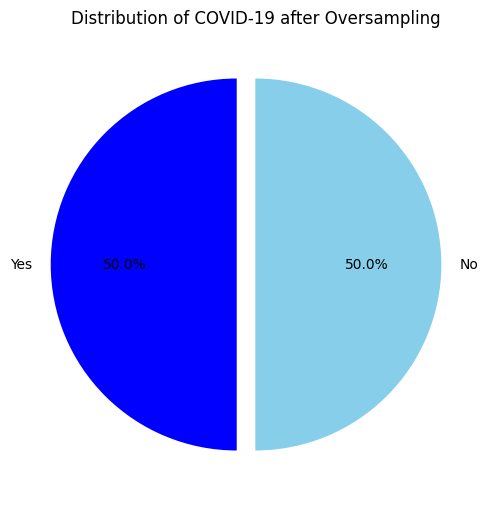

In [80]:
value_counts = df_train_resampled['COVID-19'].value_counts()

plt.figure(figsize=(6,8))
plt.pie(value_counts,
        labels=labels_to_use,
        explode=(.1, 0),
        colors=['blue', 'skyblue'],
        autopct="%1.1f%%",
        startangle=90)
plt.title('Distribution of COVID-19 after Oversampling')
plt.show()

After applying SMOTE to oversample the data, the classes in the training data are now balanced. Consequently, we have two sets of training data: one before applying SMOTE and one after applying SMOTE. The training model will be trained on both sets of data, and the results will be compared.

# Training Model

### Model with data train before applying SMOTE

In [81]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [82]:
# SVM Model
svm_model = SVC(probability=True)
svm_model.fit(X_train, Y_train)

y_pred_svm = svm_model.predict(X_test)

In [83]:
# Accuracy on training set
svm_model.score(X_train, Y_train)

0.9815950920245399

In [84]:
# Accuracy on test set
svm_model.score(X_test, Y_test)

0.9823399558498896

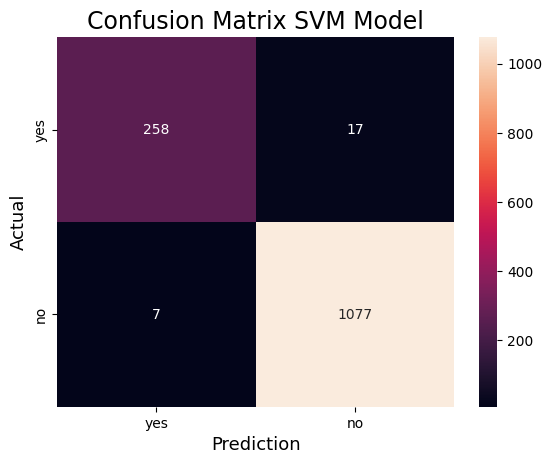

In [85]:


cm_svm = confusion_matrix(Y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='g', xticklabels=['yes','no'], yticklabels=['yes','no'])
plt.ylabel('Actual', fontsize=13)
plt.xlabel('Prediction', fontsize=13)
plt.title('Confusion Matrix SVM Model', fontsize=17)
plt.show()

In [86]:
# Decision Tree Model
dcs_model = DecisionTreeClassifier()
dcs_model.fit(X_train, Y_train)

y_pred_dcs = dcs_model.predict(X_test)

In [87]:
# Accuracy on training set
dcs_model.score(X_train, Y_train)

0.981840490797546

In [88]:
# Accuracy on test set
dcs_model.score(X_test, Y_test)

0.9852832965415746

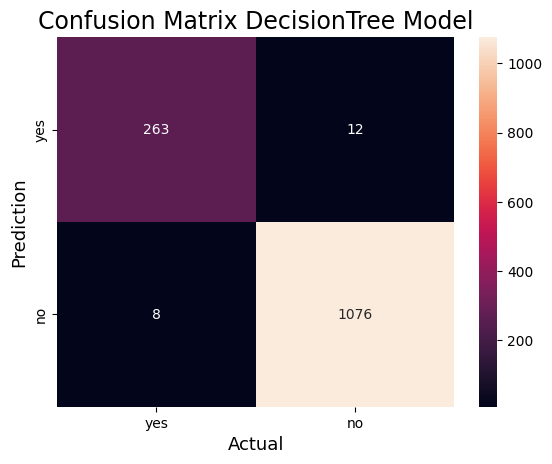

In [89]:
cm_dcs=confusion_matrix(Y_test, y_pred_dcs)
sns.heatmap(cm_dcs,
            annot=True,
            fmt='g',
            xticklabels=['yes','no'],
            yticklabels=['yes','no'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix DecisionTree Model',fontsize=17)
plt.show()

### Model with data train after applying SMOTE

In [90]:
Y_resampled= df_train_resampled['COVID-19']
X_resampled = df_train_resampled.drop(['COVID-19'], axis = 1)

In [91]:
# SVM Model resample data
svm_model_re = SVC()
svm_model_re.fit(X_resampled, Y_resampled)

y_pred_svm_re = svm_model_re.predict(X_test)

In [92]:
# Accuracy on training set
svm_model_re.score(X_resampled, Y_resampled)

0.9871173082752349

In [93]:
# Accuracy on test set
svm_model_re.score(X_test, Y_test)

0.986019131714496

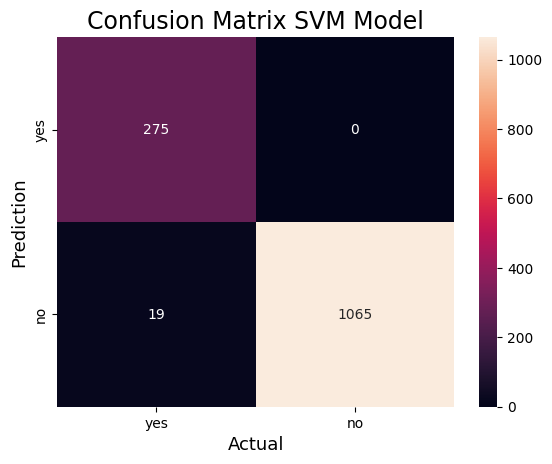

In [94]:
cm_svm_re=confusion_matrix(Y_test, y_pred_svm_re)
sns.heatmap(cm_svm_re,
            annot=True,
            fmt='g',
            xticklabels=['yes','no'],
            yticklabels=['yes','no'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix SVM Model',fontsize=17)
plt.show()

In [95]:
# Decision Tree Model
dcs_model_re = DecisionTreeClassifier()
dcs_model_re.fit(X_resampled, Y_resampled)

y_pred_dcs_re = dcs_model_re.predict(X_test)

In [96]:
# Accuracy on training set
dcs_model_re.score(X_resampled, Y_resampled)

0.9871173082752349

In [97]:
# Accuracy on test set
dcs_model_re.score(X_test, Y_test)

0.986019131714496

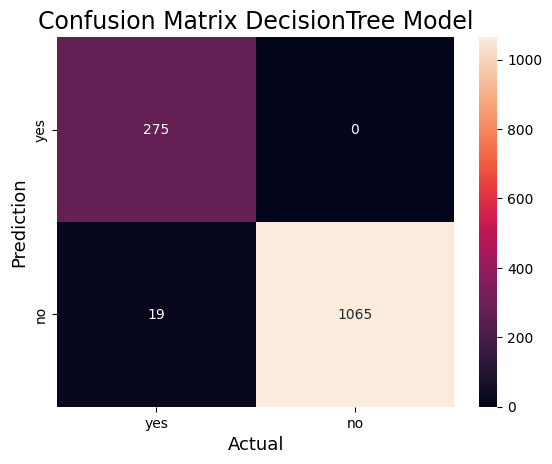

In [98]:
cm_dcs_re=confusion_matrix(Y_test, y_pred_dcs_re)
sns.heatmap(cm_dcs_re,
            annot=True,
            fmt='g',
            xticklabels=['yes','no'],
            yticklabels=['yes','no'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix DecisionTree Model',fontsize=17)
plt.show()

In [99]:
# Accuracy Scores
svm_train_accuracy = svm_model.score(X_train, Y_train)
svm_test_accuracy = svm_model.score(X_test, Y_test)

decision_tree_train_accuracy = dcs_model.score(X_train, Y_train)
decision_tree_test_accuracy = dcs_model.score(X_test, Y_test)



svm_train_accuracy_re = svm_model_re.score(X_resampled, Y_resampled)
svm_test_accuracy_re= svm_model_re.score(X_test, Y_test)

decision_tree_train_accuracy_re = dcs_model_re.score(X_resampled, Y_resampled)
decision_tree_test_accuracy_re = dcs_model_re.score(X_test, Y_test)


In [100]:
from sklearn.metrics import classification_report

# Define a function to extract precision, recall, and F1-score from the classification report
def extract_metrics(report):
    metrics = report['1']
    return metrics['precision'], metrics['recall'], metrics['f1-score']

# Get model classification reports
svm_report = classification_report(Y_test, svm_model.predict(X_test), output_dict=True)
decision_tree_report = classification_report(Y_test, dcs_model.predict(X_test), output_dict=True)

svm_re_report = classification_report(Y_test, svm_model_re.predict(X_test), output_dict=True)
decision_tree_re_report = classification_report(Y_test, dcs_model_re.predict(X_test), output_dict=True)

# Extract metrics
svm_metrics = extract_metrics(svm_report)
decision_tree_metrics = extract_metrics(decision_tree_report)

svm_re_metrics = extract_metrics(svm_re_report)
decision_tree_re_metrics = extract_metrics(decision_tree_re_report)

# Create a DataFrame
results = pd.DataFrame({
    'Model': [
        'SVM', 'Decision Tree',
        'SVM Data Oversampling', 'Decision Tree Data Oversampling'
    ],
    'Training Accuracy': [
        svm_train_accuracy, decision_tree_train_accuracy,
        svm_train_accuracy_re, decision_tree_train_accuracy_re
    ],
    'Test Accuracy': [
        svm_test_accuracy, decision_tree_test_accuracy,
        svm_test_accuracy_re, decision_tree_test_accuracy_re
    ],
    'Precision': [
        svm_metrics[0], decision_tree_metrics[0],
        svm_re_metrics[0], decision_tree_re_metrics[0]
    ],
    'Recall': [
        svm_metrics[1], decision_tree_metrics[1],
        svm_re_metrics[1], decision_tree_re_metrics[1]
    ],
    'F1-Score': [
        svm_metrics[2], decision_tree_metrics[2],
        svm_re_metrics[2], decision_tree_re_metrics[2]
    ]
})

print(results)



                             Model  Training Accuracy  Test Accuracy  \
0                              SVM           0.981595       0.982340   
1                    Decision Tree           0.981840       0.985283   
2            SVM Data Oversampling           0.987117       0.986019   
3  Decision Tree Data Oversampling           0.987117       0.986019   

   Precision    Recall  F1-Score  
0   0.984461  0.993542  0.988981  
1   0.988971  0.992620  0.990792  
2   1.000000  0.982472  0.991159  
3   1.000000  0.982472  0.991159  


Conclusion

Models that use oversampling techniques (SVM Data Oversampling, Decision Tree Data Oversampling) tend to have higher accuracy than models without oversampling. However, the differences are slight. This indicates that data oversampling effectively addresses the problem of class imbalances in the datasets.

The Decision Tree model (either with or without oversampling) consistently shows good performance. This indicates that the data structure used may match the decision tree approach.

For most models, the difference between training and test accuracy is relatively minor, indicating that the models are not overfitting.

The evaluation results show that:

Oversampling is an effective technique to improve model performance on unbalanced datasets.

The Decision Tree is a powerful algorithm for this data set.